# Working with multidimensional spatial data in Python

## Overview 

In this notebook, we will use be introduced to the foundational packages for working with spatial data in python, and learn how to use these to manipulate spatial data.

## Learning Objectives
1. Use `numpy` to manipulate array data
2. Use `pandas` to manipulate tabular data
3. Apply basic geospatial manipulations to vector data using `geopandas`
3. Work with multidimensional gridded data in `xarray`
3. Perform geospatial operations on `xarray`s using `rioxarray`

## Requirements
This tutorial requires the following Python modules installed `numpy`, `pandas`,`geopandas`, `xarray`,`rioxarray`


### Foundational Python Packages

#### NumPy

NumPy is a popular library for storing arrays of numbers and performing computations on them. Not only does it enable writing more succinct code, it also makes the code faster, since most NumPy routines are implemented in C for speed.

Numpy is probably the most important package for doing data science and scientific analysis in Python. It is very powerful and is often the basis for other packages that add additional complexity (it is at the core of all raster handling packages in python)

To use NumPy in your program, you need to import it as follows

In [1]:
import numpy as np

##### Array creation



NumPy arrays can be created from Python lists

In [2]:
my_array = np.array([1, 2, 3])
my_array

array([1, 2, 3])

NumPy supports arrays of arbitrary dimension. For example, we can create two-dimensional arrays (e.g. to store a matrix) as follows

In [3]:
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]])
my_2d_array

array([[1, 2, 3],
       [4, 5, 6]])

We can access individual elements of a 2d-array using two indices as indexing  works just like for Python lists

In [4]:
# index using:
# position_in_dim1, position_in_dim2
my_2d_array[1, 2]

6

We can also access rows

In [5]:
my_2d_array[1]

array([4, 5, 6])

and columns

In [6]:
my_2d_array[:, 2]

array([3, 6])

a bare index of `:` means give me everything in that dim

In [7]:
print(my_2d_array[:, :])
#is the same as
print(my_2d_array)

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


Arrays have a `shape` attribute

In [8]:
print(my_array.shape)
print(my_2d_array.shape)

(3,)
(2, 3)


##### Basic operations

In NumPy, we express computations directly over arrays. This makes the code much more succint.

Arithmetic operations can be performed directly over arrays. For instance, assuming two arrays have a compatible shape, we can add them as follows

In [9]:
array_a = np.array([1, 2, 3])
array_b = np.array([4, 5, 6])
array_a + array_b

array([5, 7, 9])

NumPy has a range of functions that can be applied to arrays, e.g. `np.sin`

In [10]:
np.sin(array_a)

array([0.84147098, 0.90929743, 0.14112001])

numpy arrays also have their own methods e.g matrix transpose `.transpose()`

In [11]:
array_a.transpose()

array([1, 2, 3])

Because numpy arrays can have many dimensions, indexing can get quite complicated. If you want to know more have a look at the docs [here](https://numpy.org/doc/stable/user/basics.indexing.html). Lets look at what this looks like on a 3D array

In [12]:
# Create a 3D array with values ranging from 0 to 269 with shape 3x3x30.
array_3d = np.arange(270).reshape(3, 3, 30)
array_3d

array([[[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
          12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
          24,  25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
          54,  55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89]],

       [[ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
         102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
         114, 115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
         132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149],
        [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
         162, 163, 164, 165, 166, 167, 

Lets pretend that this array has dimension latitude, longitude and band (3x3x30). Now lets extract a spatial subset  - we only want the first 2x2 lat long grid with all wavelengths

In [13]:
#dimensions separated by comma
#1st dim - :2 indicates we want everything up to the 2nd coordinate i.e 0 and 1. Writing 0:2 would be equivalent
#2nd dim - sanme as above
#3rd dim -  : a bare semicolon indicate we want all entires in that dimension
sliced_array = array_3d[:2, :2, :]
sliced_array

array([[[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
          12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
          24,  25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
          54,  55,  56,  57,  58,  59]],

       [[ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
         102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
         114, 115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
         132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149]]])

#### Pandas


Pandas is the Python library used for tabular data manipulation and analysis. It is **very** widely used. It is the Python version of dplyr, tidyr and readr rolled into one.

Here's an example of loading a DataFrame from a CSV file:

In [14]:
import pandas as pd

# Load data from a CSV file into a DataFrame
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


There are lots and lots of tutorial on how to wrnagle data with pandas. I will just show you some basics

##### Indexing
Or how to select particular rows and columns

In [15]:
# Accessing a column
print(df['sepal_length'])

# use .loc to access a row by label
print(df.loc[0])

# use .iloc to access a row by integer index
print(df.iloc[0])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


##### Filtering
or selecting rows by a logical condition


In [16]:
# Filter rows where 'sepal_length' is greater than 5
filtered = df[df['sepal_length'] > 5]

#what is happening here is that df['sepal_length'] > 5 is creating a series of True/False values based on the condition
#this is then used to retrun rows where the series is True

print(filtered)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
10            5.4          3.7           1.5          0.2     setosa
14            5.8          4.0           1.2          0.2     setosa
15            5.7          4.4           1.5          0.4     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[118 rows x 5 columns]


another way of achieving the same thing is using `query`

In [17]:
filtered = df.query('sepal_length > 5')

print(filtered)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
10            5.4          3.7           1.5          0.2     setosa
14            5.8          4.0           1.2          0.2     setosa
15            5.7          4.4           1.5          0.4     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[118 rows x 5 columns]


##### Grouping and aggregation

In [18]:
# Group data by the values in 'species' and compute the mean of the other columns for each group
grouped = df.groupby('species').mean()
print(grouped)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [19]:
# or maybe we just want the aggregation of a single colmn
petal_grouped = df.groupby('species')['petal_length'].mean()
print(petal_grouped)

species
setosa        1.464
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


is the same as

In [20]:
#we can use the .mean() method without explicitly assinging the result of the preceding function
#the trick is that you have to know the the type/class of the first function is to know what methods it has
#but with pandas the results are usually another dataframe
result = df.groupby('species').mean()

Lets see how we can chain many things together

In [21]:
#lets do everything above in one step
result = (pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
          .query('sepal_length > 5')
          .groupby('species')
          .mean())

print(result)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.313636     3.713636      1.509091     0.277273
versicolor      5.997872     2.804255      4.317021     1.346809
virginica       6.622449     2.983673      5.573469     2.032653


### Geospatial data handling
A number of packages exist for working with geospatial data in Python. Some are more widely used than others. GeoPandas is the standard for working with spatial vector data. For working with raster data traditionally Rasterio has been the standard. Rasterio is a wrapper for GDAL which you may already be familiar with. Rasterio is not well suited to working with data with more than 2 dimensions (lat/long) or with a large number of bands. Xarray is well suited to high-dimensional data, and is rapidly growing in popularity. Hence this is what we will focus on. We will also spend a fair bit of time learning about dask, a package for making xarray (and Python in general) scale to large datasets.

#### Vector data with GeoPandas
[GeoPandas](https://geopandas.org/en/stable/getting_started.html) extends the datatypes used by pandas to allow spatial operations on geometric types. If you have worked with sf in R, you will find Geopandas very familiar. Underneath, Geopandas uses GEOS for geometric calculcation via the shapely package. In R, sf also uses GEOS.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame` that can store geometry columns and perform spatial operations.
A GeoDataFrame is a combination of regular pandas columns (`pandas.Series`), with traditional data and a special geometry column (`geopandas.GeoSeries`), with geometries (points, polygons, etc.). The geometry column has a `GeoSeries.crs` attribute, which stores information about the projection

![](geopandas.png)

In this example, we will explore 2 datasets, `swfynbos.gpkg`, a dataset of the vegetation types of the southwestern Cape of South Africa, and `fynbos_remnants`, a dataset of the remaining fragments of natural vegetation in this region. This data is in the geopackage format but Geopandas can open all commonly encountered geospatial vector data formats.

In [22]:
#we typically use the alias gpd
import geopandas as gpd

#read file
vegtypes = gpd.read_file('/shared/users/gmoncrieff/swfynbos.gpkg')

#view some rows
vegtypes.head()

,Name_18,MAPCODE18,geometry
0,Atlantis Sand Fynbos,FFd4,"MULTIPOLYGON (((18.73707 -33.68504, 18.73760 -..."
1,Atlantis Sand Fynbos,FFd4,"MULTIPOLYGON (((18.76015 -33.58306, 18.76066 -..."
2,Atlantis Sand Fynbos,FFd4,"MULTIPOLYGON (((18.64270 -33.50115, 18.64216 -..."
3,Atlantis Sand Fynbos,FFd4,"MULTIPOLYGON (((18.65830 -33.49548, 18.65885 -..."
4,Atlantis Sand Fynbos,FFd4,"MULTIPOLYGON (((18.67123 -33.49252, 18.67070 -..."


Before getting into some data manipulations, lets looks at some attributes of the data. Geopandas allows us to easlity access some relevant attributes of our data

In [23]:
#the type of each geometry
print(vegtypes.type)

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
843    MultiPolygon
844    MultiPolygon
845    MultiPolygon
846    MultiPolygon
847    MultiPolygon
Length: 848, dtype: object


In [24]:
#area of each polygon
print(vegtypes.area)

0      3.631849e-05
1      8.440787e-03
2      3.851677e-05
3      4.072849e-04
4      1.907286e-04
           ...     
843    1.222378e-04
844    1.727596e-04
845    7.029317e-07
846    5.225343e-06
847    3.595376e-06
Length: 848, dtype: float64


In [25]:
#centroid of each polygon
print(vegtypes.centroid)

0      POINT (18.73293 -33.68426)
1      POINT (18.74816 -33.63233)
2      POINT (18.64129 -33.49871)
3      POINT (18.65163 -33.50852)
4      POINT (18.66857 -33.48504)
                  ...            
843    POINT (18.88481 -34.21236)
844    POINT (18.87599 -34.17239)
845    POINT (19.00402 -34.07498)
846    POINT (18.98670 -34.04231)
847    POINT (18.98381 -34.03586)
Length: 848, dtype: geometry


We can print the coordinate reference system of the geodataframe using `.crs`

In [26]:
vegtypes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Doing things like filters, selecting columns and rows, etc works exactly like a Pandas dataframe, as a geodataframe is a subclass of a dataframe

In [27]:
#select first 5 rows
print(vegtypes.iloc[0:5])

                Name_18 MAPCODE18  \
0  Atlantis Sand Fynbos      FFd4   
1  Atlantis Sand Fynbos      FFd4   
2  Atlantis Sand Fynbos      FFd4   
3  Atlantis Sand Fynbos      FFd4   
4  Atlantis Sand Fynbos      FFd4   

                                            geometry  
0  MULTIPOLYGON (((18.73707 -33.68504, 18.73760 -...  
1  MULTIPOLYGON (((18.76015 -33.58306, 18.76066 -...  
2  MULTIPOLYGON (((18.64270 -33.50115, 18.64216 -...  
3  MULTIPOLYGON (((18.65830 -33.49548, 18.65885 -...  
4  MULTIPOLYGON (((18.67123 -33.49252, 18.67070 -...  


In [28]:
#filter to a single vegtypes
print(vegtypes.query('Name_18 == "Hangklip Sand Fynbos"').head())

                  Name_18 MAPCODE18  \
408  Hangklip Sand Fynbos      FFd6   
409  Hangklip Sand Fynbos      FFd6   
410  Hangklip Sand Fynbos      FFd6   
411  Hangklip Sand Fynbos      FFd6   
412  Hangklip Sand Fynbos      FFd6   

                                              geometry  
408  MULTIPOLYGON (((19.11537 -34.35930, 19.11566 -...  
409  MULTIPOLYGON (((18.83174 -34.33894, 18.83178 -...  
410  MULTIPOLYGON (((18.82974 -34.33846, 18.83046 -...  
411  MULTIPOLYGON (((18.99561 -34.34287, 18.99561 -...  
412  MULTIPOLYGON (((18.99545 -34.34217, 18.99542 -...  



Plotting is easy too. Like Pandas there is a handy `.plot()` method for geodataframes.

<Axes: >

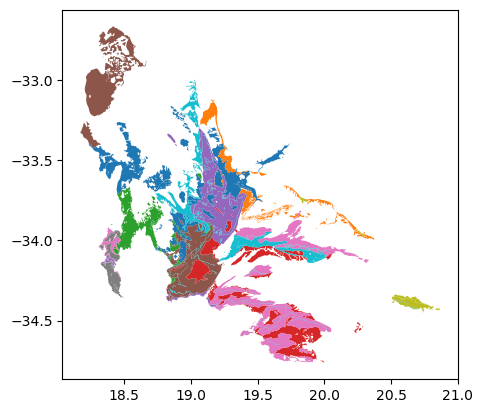

In [29]:
#colour plot by vegetation type
vegtypes.plot('Name_18')

Before we start playing with maniplating geodataframes based on their geometries, let's load another dataset that we will combine with the first

In [30]:
remnants = gpd.read_file('/shared/users/gmoncrieff/remnants.gpkg')
#lets view the first few rows
remnants.head()

,RLE2021,Endemic,geometry
0,LC,Endemic,"MULTIPOLYGON (((17.10320 -28.46677, 17.10289 -..."
1,LC,Endemic,"MULTIPOLYGON (((17.25375 -28.79040, 17.25313 -..."
2,LC,Endemic,"MULTIPOLYGON (((17.58954 -29.56134, 17.58923 -..."
3,LC,Endemic,"MULTIPOLYGON (((17.58671 -29.57930, 17.58673 -..."
4,LC,Endemic,"MULTIPOLYGON (((17.69563 -29.74812, 17.69407 -..."


Set operations like intersections and unions can be applied using the `gpd.overlay()` function. Let's extract the remaining natural vegetation of each vegetation type

<Axes: >

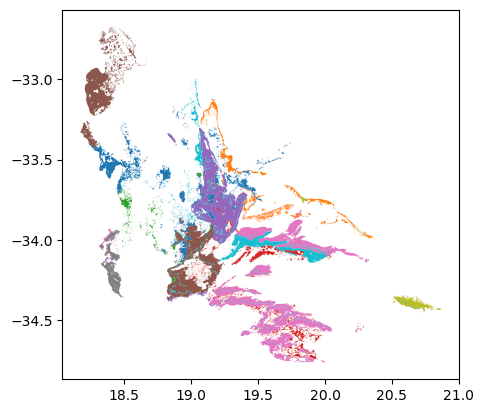

In [31]:
#intersection of vegtypes and remnants
veg_remnants = gpd.overlay(vegtypes,remnants,how='intersection')

#plot!
veg_remnants.plot('Name_18')

When executing set operations, the properties from both input dataframes are retained, so each row in the output will have all the columns from the inputs

In [32]:
veg_remnants.head()

,Name_18,MAPCODE18,RLE2021,Endemic,geometry
0,Atlantis Sand Fynbos,FFd4,CR,Endemic,"MULTIPOLYGON (((18.74560 -33.57731, 18.74559 -..."
1,Atlantis Sand Fynbos,FFd4,CR,Endemic,"POLYGON ((18.75564 -33.57943, 18.75566 -33.579..."
2,Atlantis Sand Fynbos,FFd4,CR,Endemic,"MULTIPOLYGON (((18.74138 -33.58110, 18.74144 -..."
3,Atlantis Sand Fynbos,FFd4,EN,Endemic,"POLYGON ((18.74125 -33.58128, 18.74147 -33.581..."
4,Atlantis Sand Fynbos,FFd4,EN,Endemic,"MULTIPOLYGON (((18.76906 -33.58237, 18.76920 -..."


finally, lets combine all polygons with the same threat status together using `dissolve` to simplify our geodataframe

In [33]:
#all polygons with the saem threat status into one
veg_remnants_simple = veg_remnants.dissolve('RLE2021')
#view
veg_remnants_simple.head()

,geometry,Name_18,MAPCODE18,Endemic
RLE2021,,,,
CR,"MULTIPOLYGON (((18.35222 -34.15510, 18.35224 -...",Atlantis Sand Fynbos,FFd4,Endemic
EN,"MULTIPOLYGON (((18.24263 -33.41139, 18.24241 -...",Atlantis Sand Fynbos,FFd4,Endemic
LC,"MULTIPOLYGON (((18.26847 -33.42568, 18.26847 -...",Atlantis Sand Fynbos,FFd4,Endemic
VU,"MULTIPOLYGON (((18.42952 -33.99259, 18.42953 -...",Atlantis Sand Fynbos,FFd4,Endemic


There is tons more functionality in GeoPandas, you can spatially join geodatframes with `.sjoin()`, reproject using `to_crs()`, and do all the good stuff you would expect. Two great places to dive deeper are the [GeoPandas user guide](https://geopandas.org/en/stable/docs/user_guide.html), and [the Carpentries lesson on vector data in Python](https://carpentries-incubator.github.io/geospatial-python/07-vector-data-in-python/index.html)

#### Gridded data with Xarray

##### xarray concepts

[Xarray](https://docs.xarray.dev/en/stable/) is the meat and potatoes of working with multidimensional gridded data in Python. While numpy provides many of the core operations we need for working with gridded data like indexing  matrix operations, etc it does not provide the functionality to add information about the various dimensions of arrays, the coordinates of grid cells, or attached important metadata. This is where Xarray comes in.

By including labels on array dimensions Xarray opens up many new possibilities:

- applying operations over dimensions by name: x.sum('time').

- selecting values by label x.sel(time='2014-01-01').

- use the split-apply-combine paradigm with groupby: x.groupby('time.dayofyear').mean().

- keeping track of arbitrary metadata in the form of a Python dictionary: x.attrs.

- and much more

The Xarray data structure makes it trivial to go from 2 to 3 to 4 to N dimensions, hence it is a great choice for working with imaging spectroscopy data where we will have at least 3 (lat, lon, wavelength) dimensions. Another big benefit is that it seamlessly integrates with `Dask` a popular library for parallel computing in Python. This allows us to scale analysis with Xarray to very large data.



The core data structure of Xarray is an `xarray.DataArray` - which in its simplest form is just a Numpy array with named dimensions and coordinates on those dimensions. We can combine multiple `xarray.DataArray` in a single structure called a `xarray.Dataset`. Let's see what this looks like

In [34]:
#typically we use the xr aliais
import xarray as xr
import numpy as np

#create a 2x3 np array
arr = np.random.randn(2, 3)

#create a xarray.DataArray by naming the dims and giving them coordinates
xda = xr.DataArray(arr,
                    dims=("x", "y"),
                    coords={"x": [10, 20],
                            "y": [1.1,1.2,1.3]})

xda

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-1.11348968, -0.09590683, -0.31952776],
       [ 0.60124029,  0.46619606, -0.18626485]])
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) float64 24B 1.1 1.2 1.3

We can access the individual components like the data itself, the dimension names or the coordinates using accessors

In [35]:
#get the actual data
print(xda.values)

[[-1.11348968 -0.09590683 -0.31952776]
 [ 0.60124029  0.46619606 -0.18626485]]


In [36]:
#get teh dimenson names
print(xda.dims)

('x', 'y')


In [37]:
#get the x coordinates
print(xda.x)

<xarray.DataArray 'x' (x: 2)> Size: 16B
array([10, 20])
Coordinates:
  * x        (x) int64 16B 10 20


We can set or get any metadata attribute we like

In [38]:
xda.attrs["long_name"] = "random mesurement"
xda.attrs["random_attribute"] = 123

print(xda.attrs)

{'long_name': 'random mesurement', 'random_attribute': 123}


and perform calculations on `xarray.DataArrays` as if they were Numpy arrays

In [39]:
xda + 10

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[ 8.88651032,  9.90409317,  9.68047224],
       [10.60124029, 10.46619606,  9.81373515]])
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) float64 24B 1.1 1.2 1.3

In [40]:
np.sin(xda)

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-0.89724495, -0.09575987, -0.31411826],
       [ 0.56566569,  0.44949154, -0.18518965]])
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) float64 24B 1.1 1.2 1.3
Attributes:
    long_name:         random mesurement
    random_attribute:  123

An `xarray.Dataset` is a container of multiple aligned DataArray objects

In [41]:
#create a new dataarray with aligned dimensions (but it can be more or fewer dims)
#create a new 2x3x4 xarray Dataarray
arr2 = np.random.randn(2, 3, 4)
xda2 = xr.DataArray(arr2,
                    dims=("x", "y","z"),
                    coords={"x": [10, 20],
                            "y": [1.1,1.2,1.3],
                            "z": [20,200,2000,20000]})

#combine with another xarray.DataArray to make a xarray.Dataset
xds = xr.Dataset({'foo':xda,'bar':xda2})
xds


<xarray.Dataset> Size: 312B
Dimensions:  (x: 2, y: 3, z: 4)
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) float64 24B 1.1 1.2 1.3
  * z        (z) int64 32B 20 200 2000 20000
Data variables:
    foo      (x, y) float64 48B -1.113 -0.09591 -0.3195 0.6012 0.4662 -0.1863
    bar      (x, y, z) float64 192B -0.0297 0.2747 0.67 ... 0.14 1.905 0.2858

Here you can see that we have multiple arrays in a single dataset. Xarray automatically aligns the arrays based on shared dimensions and coodrinates. You can do almost everything you can do with DataArray objects with Dataset objects (including indexing and arithmetic) if you prefer to work with multiple variables at once. You can also easily retrieve a single DataArray by name from a Dataset

In [42]:
xds.foo
# xds['foo'] works the same

<xarray.DataArray 'foo' (x: 2, y: 3)> Size: 48B
array([[-1.11348968, -0.09590683, -0.31952776],
       [ 0.60124029,  0.46619606, -0.18626485]])
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) float64 24B 1.1 1.2 1.3
Attributes:
    long_name:         random mesurement
    random_attribute:  123

##### Terminology
It is important to be precise with our terminology when dealing with Xarrays as things can quickly get confusing when working with many dims. The full glossary can be found [here](https://docs.xarray.dev/en/stable/user-guide/terminology.html), but a quick recap:
- `xarray.DataArray` - A multi-dimensional array with labeled or named dimensions
- `xarray.Dataset` - A collection of DataArrays with aligned dimensions
- **Dimension** - The (named) axes of an array
- **Coordinate** - An array that labels a dimension

![](xarray.png)

##### loading data from files

Xarray supports reading and writing of several file formats, from simple Pickle files to the more flexible netCDF format. The recommended way to store Xarray data structures is netCDF. Xarray is based on the netCDF data model, so netCDF files on disk directly correspond to Dataset objects. If you aren’t familiar with this data format, the [netCDF FAQ](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#What-Is-netCDF) is a good place to start. When we are working with complex multidimensional data, file formats start to matter a lot, and they make a big difference to how fast and efficiently we can load and analyse data. More on this in the next lesson.

We can load netCDF files to create a new Dataset using `open_dataset()`. Similarly, a DataArray can be saved to disk using the `DataArray.to_netcdf()` method

For the rest of this lesson we will work with a small dataset from a [Specim FENIX](https://www.specim.com/products/fenix/) airbone imaging spectrometer collected near the town of Franschoek, near Cape Town in 2018. Lots of important metadata about the image has been removed to keep this simple. All that remains are the measured reflectances, and the latitude, longitude and wavelength coordinates.

In [43]:
xda_is = xr.open_dataset("/shared/users/gmoncrieff/is_example.nc")
xda_is

<xarray.Dataset> Size: 33MB
Dimensions:      (wl: 267, x: 250, y: 250)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.383 2.389 2.395
  * x            (x) float64 2kB 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 2kB 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) int16 33MB ...

##### indexing, selecting and masking

While you can use numpy-like indexing e.g `da[:,:]`, this does not make use of the power of having named dims and coords. Xarray as specific method for selecting using the position in the array `.isel()` and using the coordinates with `.sel()`

In [44]:
#idexing using position
xda_is.isel(x=20,y=20)

<xarray.Dataset> Size: 3kB
Dimensions:      (wl: 267)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.383 2.389 2.395
    x            float64 8B 3.173e+05
    y            float64 8B 6.263e+06
Data variables:
    reflectance  (wl) int16 534B ...

We can extract a continous slice of an array dimension using `slice()`

In [45]:
xda_is.isel(x=20,y=20,wl=slice(0,20))

<xarray.Dataset> Size: 216B
Dimensions:      (wl: 20)
Coordinates:
  * wl           (wl) float64 160B 0.4066 0.4134 0.4201 ... 0.5222 0.529 0.5359
    x            float64 8B 3.173e+05
    y            float64 8B 6.263e+06
Data variables:
    reflectance  (wl) int16 40B ...

We can use all the same techniques, but provive coordinate values rather than positions if we use `.sel()`. We can also provide an option for what to do if we do not get an exact match to the provided coordinates.

In [46]:
xda_is.sel(x=3.175e+05,y=6.263e+06,method='nearest')

<xarray.Dataset> Size: 3kB
Dimensions:      (wl: 267)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.383 2.389 2.395
    x            float64 8B 3.175e+05
    y            float64 8B 6.263e+06
Data variables:
    reflectance  (wl) int16 534B ...

We can mask values in our array using conditions based on the array values or coordinate values with `.where()`

In [47]:
# drop bad bands
xda_is = xda_is.where(xda_is.wl < 2.1,drop=True)
xda_is

<xarray.Dataset> Size: 55MB
Dimensions:      (wl: 218, y: 250, x: 250)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.082 2.088 2.095
  * x            (x) float64 2kB 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 2kB 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) float32 54MB 39.0 24.0 32.0 ... 1.613e+03 1.702e+03

You may notice that often it takes almost no time at all to run xarray code. This is because for many functions xarray does not load data from disk and actually perform the calculation, rather it simply prints a summary and high-level overview of the data that will be produced. This is called **Lazy computation** and is the smart thing to do when working with large datasets. Only when you really need to do the calculation does it actually happen - like when calling `.plot()` or writing results. We can force computation by running `xarray.DataArray.compute()`

In [48]:
xda_is.compute()

<xarray.Dataset> Size: 55MB
Dimensions:      (wl: 218, y: 250, x: 250)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.082 2.088 2.095
  * x            (x) float64 2kB 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 2kB 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) float32 54MB 39.0 24.0 32.0 ... 1.613e+03 1.702e+03

##### Chunks
When opening our data we can specific that we want the data split into chunks along each dimension like this:

In [49]:
xda_chunk = xr.open_dataset("/shared/users/gmoncrieff/is_example.nc",chunks={'x':50,'y':50,'wl':-1})
xda_chunk

<xarray.Dataset> Size: 33MB
Dimensions:      (wl: 267, x: 250, y: 250)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.383 2.389 2.395
  * x            (x) float64 2kB 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 2kB 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) int16 33MB dask.array<chunksize=(267, 50, 50), meta=np.ndarray>

##### What does this do, and why should we do it?
If you don't specify that you want the dataset chunked, xarray will load all the data into a numpy array. This can be okay if you are working witha small dataset but as your data grows larger chunking has a number of advantages:
 
 - __Efficient Memory Usage__
 Without chunking, xarray loads the entire dataset into memory as NumPy arrays, which can use a lot of RAM and may cause your system to slow down or crash. Chunking splits the data into smaller pieces, allowing you to work with datasets that are bigger than your available memory by loading only what you need.
 
 - __Better Performance__
Processing smaller chunks can speed up computations and make data handling more efficient.Data is loaded into memory only when required, reducing unnecessary memory usage and improving processing speed.

Checkout the [dask documentation on chunks](https://docs.dask.org/en/latest/array-chunks.html) to find out more about chunking your array.

##### Default chunking and rechunking
Some file types like netCDF or zarr have native chunking, and it is usually most efficient to use the chunking that is already present. If you specify `chunks='auto'` chunking will be automatically determined. This is a major advantage as chunking/rechunking can be expensive for large files. The downside is that you are subject to the chunking chosen by the creator of the file. 

You will remember that forcing computation using `compute()` returned a Numpy array. If we want to force computation but keep the resulting array as a chunked array we can use `persist()` instead.

In [50]:
#the example from above
xda_chunk = xda_chunk.where(xda_chunk.wl < 2.1,drop=True)
#persist instead of compute
xda_chunk.persist()


<xarray.Dataset> Size: 55MB
Dimensions:      (wl: 218, y: 250, x: 250)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.082 2.088 2.095
  * x            (x) float64 2kB 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 2kB 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) float32 54MB dask.array<chunksize=(218, 50, 50), meta=np.ndarray>

#### Make xarray geospatial with rioxarray

Although we have latitude and longitude values associated with our Xarray, this data is not a proper geospatial dataset and hence we cannot do spatial manipulations like calculating distances or reprojecting. Xarray is a general-purpose tool for any multidimensional data and is not specific to geospatial data. We need an additional package `rioxarray` which brings all of the power of `GDAL` to Xarrays. `rioxarray` extends Xarray with the `rio` accessor. What this means is that a bunch of new functions become available to Xarray instances by typing `xarray.DataArray.rio.` 

In [51]:
import rioxarray

The first and most important detail we need to add before turning our Xarray into a geospatial dataset is information about the projection. Here we know the current crs is epsg:32734 (UTM zone 34S) 

In [52]:
xda_chunk = xda_chunk.rio.write_crs('epsg:32734')
xda_chunk.rio.crs

CRS.from_epsg(32734)

In [53]:
xda_chunk

<xarray.Dataset> Size: 55MB
Dimensions:      (wl: 218, y: 250, x: 250)
Coordinates:
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.082 2.088 2.095
  * x            (x) float64 2kB 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 2kB 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
    spatial_ref  int64 8B 0
Data variables:
    reflectance  (wl, y, x) float32 54MB dask.array<chunksize=(218, 50, 50), meta=np.ndarray>

Now that we know the current projection, it is easy to reproject to match the projection of the vector data we were working with earlier

In [54]:
xda_chunk_wgs = xda_chunk.rio.reproject('epsg:4326')
xda_chunk_wgs

<xarray.Dataset> Size: 56MB
Dimensions:      (x: 277, y: 232, wl: 218)
Coordinates:
  * x            (x) float64 2kB 19.03 19.03 19.03 19.03 ... 19.04 19.04 19.04
  * y            (y) float64 2kB -33.76 -33.76 -33.76 ... -33.77 -33.77 -33.77
  * wl           (wl) float64 2kB 0.4066 0.4134 0.4201 ... 2.082 2.088 2.095
    spatial_ref  int64 8B 0
Data variables:
    reflectance  (wl, y, x) float32 56MB 3.403e+38 3.403e+38 ... 3.403e+38

rioxarray gives us the ability to perform a numbr of spatial operations e.g. clip and mosaict, and read and write any file format supported by GDAL. This is as simple as `rioxarray.open_rasterio()` and `xarray.DataArray.rio.to_raster()`

### credits:

This lesson has borrowed heavily from:  

[https://github.com/data-psl/lectures2020](https://github.com/data-psl/lectures2020)

[The Carpentries Geospatial Python lesson by Ryan Avery](https://carpentries-incubator.github.io/geospatial-python/)  

[The geopandas user guide](https://geopandas.org/en/stable/docs/user_guide.html)  

[The xarray user guide](https://docs.xarray.dev/en/stable/user-guide/index.html) 

[An Introduction to Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)
